<a href="https://colab.research.google.com/github/nguyenhuuduong20062002/NguyenHuuDuong20104025/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/BTVN/Flower

/content/drive/MyDrive/Colab Notebooks/BTVN/Flower


In [ ]:
ls

Test/  Train/


In [ ]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
flower_train = train_datagen.flow_from_directory(
    './Train/',
    target_size= (200, 200),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


flower_test = test_data.flow_from_directory(
    './Test/', 
    target_size= (200, 200), 
    batch_size = 16,
    class_mode = 'categorical')

Found 2281 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 128)     

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(flower_train, epochs=20, batch_size=128)

Epoch 1/20
143/143 [==============================] - 263s 2s/step - loss: 1.0661 - accuracy: 0.5712
Epoch 2/20
143/143 [==============================] - 201s 1s/step - loss: 0.7131 - accuracy: 0.6835
Epoch 3/20
143/143 [==============================] - 200s 1s/step - loss: 0.5981 - accuracy: 0.7501
Epoch 4/20
143/143 [==============================] - 201s 1s/step - loss: 0.4585 - accuracy: 0.8189
Epoch 5/20
143/143 [==============================] - 201s 1s/step - loss: 0.3155 - accuracy: 0.8777
Epoch 6/20
143/143 [==============================] - 201s 1s/step - loss: 0.1899 - accuracy: 0.9334
Epoch 7/20
143/143 [==============================] - 204s 1s/step - loss: 0.1724 - accuracy: 0.9544
Epoch 8/20
143/143 [==============================] - 203s 1s/step - loss: 0.1050 - accuracy: 0.9750
Epoch 9/20
143/143 [==============================] - 203s 1s/step - loss: 0.1026 - accuracy: 0.9693
Epoch 10/20
143/143 [==============================] - 203s 1s/step - loss: 0.0714 - accura

In [ ]:
model.save('Flower.h5')

In [ ]:
from keras.models import load_model
model_flower=load_model('Flower.h5')

1/1 [==============================] - 0s 313ms/step
Đây là : rose


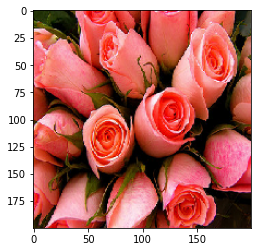

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/118974357_0faa23cce9_n.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['rose','sunflower','tulip']
h= int(np.argmax(result,axis=1))
print("Đây là :", class_name[h])

1/1 [==============================] - 0s 56ms/step
Đây là : sunflower


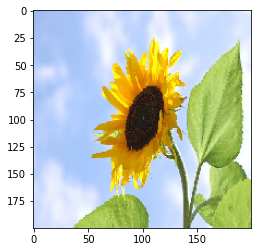

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/1240625276_fb3bd0c7b1.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['rose','sunflower','tulip']
h= int(np.argmax(result,axis=1))
print("Đây là :", class_name[h])

1/1 [==============================] - 0s 94ms/step
Đây là : tulip


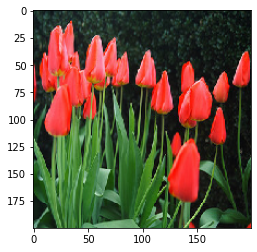

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/2418823693_72eec80f42_n.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['rose','sunflower','tulip']
h= int(np.argmax(result,axis=1))
print("Đây là :", class_name[h])

In [ ]:
!jupyter nbconvert --to html "/content/Flower.ipynb"

[NbConvertApp] Converting notebook /content/Flower.ipynb to html
[NbConvertApp] Writing 706861 bytes to /content/Flower.html
